# 需要改的参数 & 注意事项



文件必须要在repo路径下，如`D:\你的路径\Quantitative-Investment-Algorithms`
并将该路径设置到global_resources.py中的
`default_dir = 'd:\Important Files\Repositories\Quantitative-Investment-Algorithms'`

`def CAPM(index_file_or_key = '000001', processed_dfs_dict = dfs, R_f_path = R_f_path):`

参数：
1. `index_file_or_key`：必须为传入参数`processed_dfs_dict`字典中的一个密匙(key)
2. `processed_dfs_dict`：必须为经过`global_resources.py`中`def get_df_dict(start_date = STARTDATE, end_date = ENDDATE, data_dir = None):`处理过的字典，该函数会截取从STARTDATE到ENDDATE（global_resources.py中有全局变量，如果需要更改需要手动传入参数形式诸如STARTDATE = '2024-01-02'， ENDDATE = '2025-01-02'）的数据，并返回一个字典，字典中全部是以每个df中[1, 1]位置（股票代码）的值为key，每个股票按照时间截取出来的pandas dataframe为value的key-value对，而在使用get_df_dict之前需要确保pandas读取的df的列中至少有'日期'，'股票代码'为名字的两列，并且其股票代码必须在[1, 1]位置有值
3. `R_f_path`：不要动，一般来说这个不需要动， 用默认的就可以。

默认参数：
1. 如果只想使用默认值，那么就只需要改global_resources.py中的default directory就可以。

In [1]:
import CAPMlib.CAPM as capm

2024-01-02
2025-01-02
Reading files from: d:\Important Files\Repositories\Quantitative-Investment-Algorithms\Data\Stock Data\000001_daily_hfq.csv
Reading files from: d:\Important Files\Repositories\Quantitative-Investment-Algorithms\Data\Stock Data\000002_daily_hfq.csv
Reading files from: d:\Important Files\Repositories\Quantitative-Investment-Algorithms\Data\Stock Data\000004_daily_hfq.csv
Reading files from: d:\Important Files\Repositories\Quantitative-Investment-Algorithms\Data\Stock Data\000006_daily_hfq.csv
Reading files from: d:\Important Files\Repositories\Quantitative-Investment-Algorithms\Data\Stock Data\000007_daily_hfq.csv
Reading files from: d:\Important Files\Repositories\Quantitative-Investment-Algorithms\Data\Stock Data\000009_daily_hfq.csv
Reading files from: d:\Important Files\Repositories\Quantitative-Investment-Algorithms\Data\Stock Data\000014_daily_hfq.csv
Reading files from: d:\Important Files\Repositories\Quantitative-Investment-Algorithms\Data\Stock Data\000016_

In [2]:
df = capm.CAPM()

Reading files from: d:\Important Files\Repositories\Quantitative-Investment-Algorithms\Data\TEST Stock Data for CAPM\R_f_0.xlsx


In [3]:
display(df)

,Stock ID,alpha,beta
0,000002,-0.133103,0.588388
1,000004,0.047510,0.444923
2,000006,0.134027,0.514106
3,000007,0.176938,0.401954
4,000009,-0.155822,0.711304
...,...,...,...
5170,873679,-0.143341,0.982458
5171,873693,-0.006805,1.079940
5172,873703,-0.148178,1.038485
5173,873726,-0.242419,0.859793


In [4]:
display(df.sort_values(['alpha'], ascending = False))

,Stock ID,alpha,beta
2872,600198,1.615858,1.719240
204,000793,0.858017,1.425699
4953,830799,0.716319,0.430662
1985,300641,0.712161,0.903062
1906,300561,0.701903,1.263674
...,...,...,...
4880,688639,-0.460756,1.011382
3986,603388,-0.467611,0.417544
4419,688033,-0.469716,0.878646
1113,002750,-0.552562,0.333709


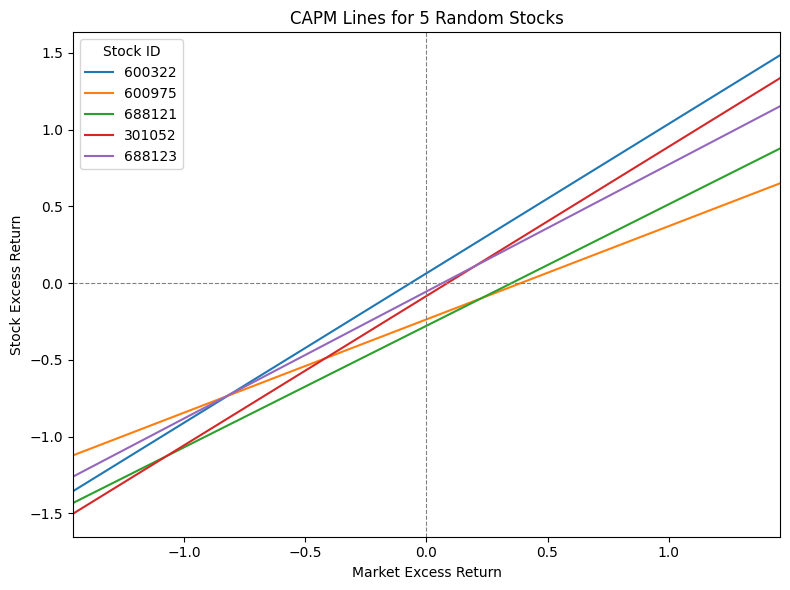

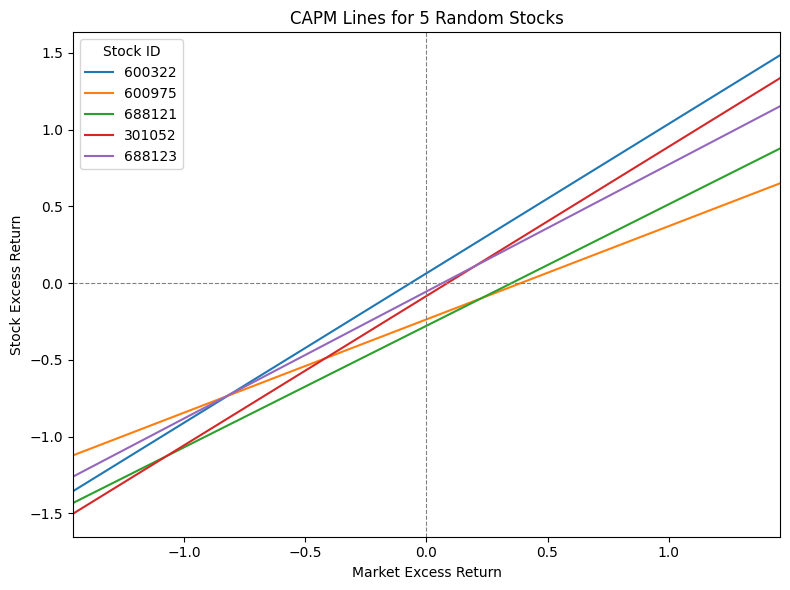

In [4]:
capm.plot_random_capm(df)

In [5]:
import global_resources as gr

In [6]:
df = gr.read_and_return_pd_df(r'Data/Stock DATA/000889_daily_hfq.csv')
display(df)

Reading files from: Data/Stock DATA/000889_daily_hfq.csv


,日期,股票代码,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
0,1997-12-18,889,7.00,8.27,8.50,6.90,177680,1.289843e+08,42.33,118.78,4.49,59.23
1,1997-12-19,889,7.60,7.75,7.99,7.55,84626,6.543138e+07,5.32,-6.29,-0.52,28.21
2,1997-12-22,889,7.68,7.95,7.99,7.18,45988,3.467077e+07,10.45,2.58,0.20,15.33
3,1997-12-23,889,7.84,8.02,8.20,7.70,45228,3.603675e+07,6.29,0.88,0.07,15.08
4,1997-12-24,889,7.89,8.10,8.25,7.73,35818,2.900035e+07,6.48,1.00,0.08,11.94
...,...,...,...,...,...,...,...,...,...,...,...,...
6131,2025-04-21,889,6.86,6.81,6.86,6.47,223002,5.787327e+07,5.60,-2.16,-0.15,2.56
6132,2025-04-22,889,6.77,6.96,7.11,6.72,230563,6.081478e+07,5.73,2.20,0.15,2.65
6133,2025-04-23,889,6.86,7.16,7.35,6.81,241954,6.467957e+07,7.76,2.87,0.20,2.78
6134,2025-04-24,889,7.16,7.50,7.74,7.11,316907,8.654176e+07,8.80,4.75,0.34,3.64


In [8]:
display(df[df['收盘'] < 0])

,日期,股票代码,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
1803,2005-07-08,889,0.28,-0.03,0.37,-0.12,7690,1745547.38,196.00,-112.00,-0.28,0.48
1804,2005-07-11,889,0.18,-0.15,0.31,-0.18,4238,955385.25,-1633.33,-400.00,-0.12,0.26
1808,2005-07-15,889,-0.03,-0.39,0.06,-0.39,11559,2509474.00,1500.00,-1400.00,-0.42,0.72
1809,2005-07-18,889,-0.42,-0.82,-0.42,-0.82,15065,3047561.50,-102.56,-110.26,-0.43,0.94
1810,2005-07-19,889,-0.73,-0.70,-0.55,-0.76,15303,3091336.00,-25.61,14.63,0.12,0.95
...,...,...,...,...,...,...,...,...,...,...,...,...
1969,2006-03-20,889,-0.12,-0.15,-0.12,-0.27,13592,2965192.75,-125.00,-25.00,-0.03,0.85
1970,2006-03-21,889,-0.15,-0.03,-0.03,-0.21,26427,5800722.50,-120.00,80.00,0.12,1.65
1971,2006-03-22,889,-0.09,-0.03,-0.03,-0.12,11605,2574600.25,-300.00,0.00,0.00,0.72
1973,2006-03-24,889,0.03,-0.06,0.06,-0.06,13952,3124187.25,200.00,-200.00,-0.12,0.87
